In [167]:
library(tidyverse)
library(haven)
library(data.table)
anes_dat <- read_sav('C:/Users/Elise Nguyen/OneDrive/Documents/Applied DS/Fall2020-Project1-linhnguyen215538/data/anes_timeseries_cdf.sav')

In [ ]:
DIFFERENCES BETWEEN DEMOCRATS AND REPUBLICANS WHO VOTED OUTSIDE OF THEIR PARTY OF AFFILIATION

In [ ]:
Introduction: 

While individual-level change in voting behaviour has not lead to a sizable shift in the overall 
split between political identification over the years (as seen in the graph below), 
that is not the case within social and economic groups. 
('https://www.pewresearch.org/politics/2020/08/04/voters-rarely-switch-parties-but-recent-shifts-further-educational-racial-divergence/')

While the majority of voters have retained their party of affiliation over the years, it's interesting to see why individuals 
would or would not deviate from how they identify themselves politically to vote for candidates of their own or those of
other parties, either on particular occasion or consistently. 

In the following analysis, we will be using the ANES time series data (1948-2016) to examine the voting behaviour of 
white Americans. In particular, we hope to answer the following questions:

- Why white Americans voted for or against candidates of their affiliated parties over the years?
- What are some social and economics characteristics of white Americans who did or did not retain their affiliation?
- What are some changes or outliers in the trends and stereotypes of certain demographic groups observed in existing research?

In [165]:
Election_years = as.character(seq(1952, 2016,4))

anes_use= anes_dat %>% 
mutate(year = as_factor(VCF0004), turnout= as_factor(VCF0703),vote = as_factor(VCF0706),race= as_factor(VCF0105a),
       gender = as_factor(VCF0104), affi = as_factor(VCF0302), 
       job = as_factor(VCF0115),employment_stat = as_factor(VCF0116), income_group=as_factor(VCF0114),
       social_class= as_factor(VCF0148), region = as_factor(VCF0112), urbanism= as_factor(VCF0111), 
       education=as_factor(VCF0110),religion = as_factor(VCF0128), media_exp = as_factor(VCF0728))%>%
       filter(year %in% Election_years)
save(anes_use, file = 'C:/Users/Elise Nguyen/OneDrive/Documents/Applied DS/Fall2020-Project1-linhnguyen215538/output/data_use.RData')
load(file = 'C:/Users/Elise Nguyen/OneDrive/Documents/Applied DS/Fall2020-Project1-linhnguyen215538/output/data_use.RData')

#Split into 2 groups of Republican vs. Democrat voters, adding reasons for/ against their party candidates and whether they 
#voted for their affiliated party
rep_vote = anes_use%>%filter(vote =='2. Republican')%>%
            mutate(for_reason= as_factor(VCF0488b), against_reason = as_factor(VCF0494b),
                  affi_stat = ifelse(affi== '1. Republican', 'Same', ifelse(affi!= '1. Republican', 'Changed',0))) #%>%
            #filter(for_reason!='NA')%>%filter(against_reason !='NA')%>% filter(!is.na(race) &! is.na(vote))

dem_vote = anes_use%>%filter(vote =='1. Democrat') %>%
            mutate(for_reason= as_factor(VCF0476b), against_reason = as_factor(VCF0482b),
                  affi_stat = ifelse(affi== '5. Democrat', 'Same', ifelse(affi!= '5. Democrat', 'Changed',0)))#%>%

#Split into 2 groups of Republican vs. Democrat affiliates, adding reasons for/ against their party candidates and whether they 
#voted for their affiliated party
rep_affi = anes_use%>%filter(affi== '1. Republican')%>%
            mutate(for_reason= as_factor(VCF0488b), against_reason = as_factor(VCF0494b),
                  affi_stat = ifelse(vote =='2. Republican', 'Same', ifelse(vote !='2. Republican', 'Changed',0)))

dem_affi = anes_use%>%filter(affi =='5. Democrat') %>%
            mutate(for_reason= as_factor(VCF0476b), against_reason = as_factor(VCF0482b),
                  affi_stat = ifelse(vote =='1. Democrat', 'Same', ifelse(vote !='1. Democrat', 'Changed',0)))

#Split further into those who voted in accordance with their affiliations and those who didn't
rep_changed_affi = anes_use%>%filter(affi =='1. Republican')%>% filter(vote !='2. Republican')%>%
            mutate(for_reason= as_factor(VCF0488b), against_reason = as_factor(VCF0494b))%>% 
            mutate(affi_stat = ifelse(affi== '1. Republican', 'Same', ifelse(affi!= '1. Republican', 'Changed',0)))

rep_kept_affi= anes_use%>%filter(affi =='1. Republican')%>% filter(vote =='2. Republican')%>%
            mutate(for_reason= as_factor(VCF0488b), against_reason = as_factor(VCF0494b))%>%
            mutate(affi_stat = ifelse(affi== '1. Republican', 'Same', ifelse(affi!= '1. Republican', 'Changed',0)))            

dem_changed_affi = anes_use%>%filter(affi =='5. Democrat')%>% filter(vote !='1. Democrat')%>%
            mutate(for_reason= as_factor(VCF0476b), against_reason = as_factor(VCF0482b))%>% 
            mutate(affi_stat = ifelse(affi== '5. Democrat', 'Same', ifelse(affi!= '5. Democrat', 'Changed',0)))

dem_kept_affi = anes_use%>%filter(affi =='5. Democrat')%>% filter(vote =='1. Democrat')%>%
            mutate(for_reason= as_factor(VCF0476b), against_reason = as_factor(VCF0482b)) %>%
            mutate(affi_stat = ifelse(affi== '5. Democrat', 'Same', ifelse(affi!= '5. Democrat', 'Changed',0)))            


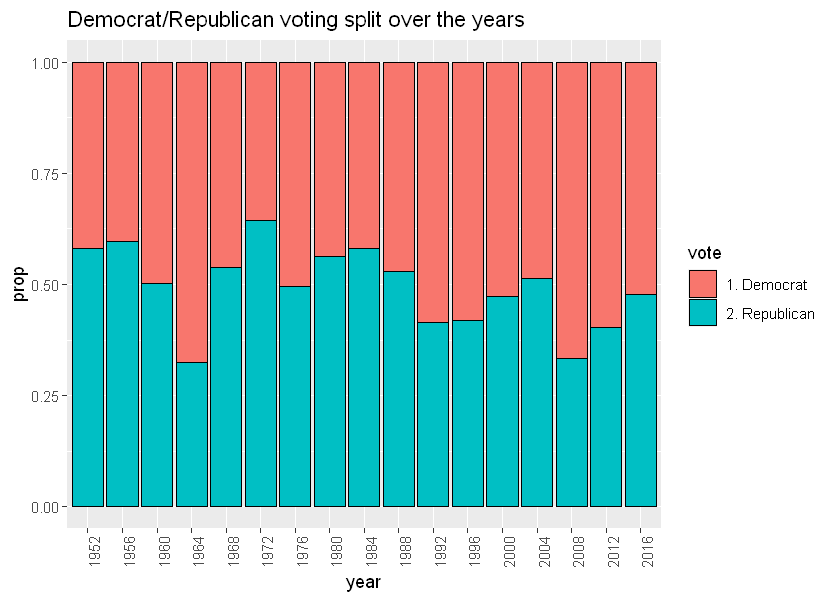

In [174]:
#head(rbind(rep_vote, dem_vote))
voter_split = anes_use %>% 
filter(!is.na(race) &! is.na(vote)) %>%
filter(vote== '1. Democrat'| vote =='2. Republican')%>%
group_by(year)%>%
count(vote) %>%
group_by(year)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=7, repr.plot.height=5)
ggplot(voter_split, aes(x=year, y = prop, fill= vote))+
geom_bar(stat='identity', color = 'black')+
#coord_flip()+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
#facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Democrat/Republican voting split over the years')

In [ ]:
i. We begin by breaking down the survey respondents by race

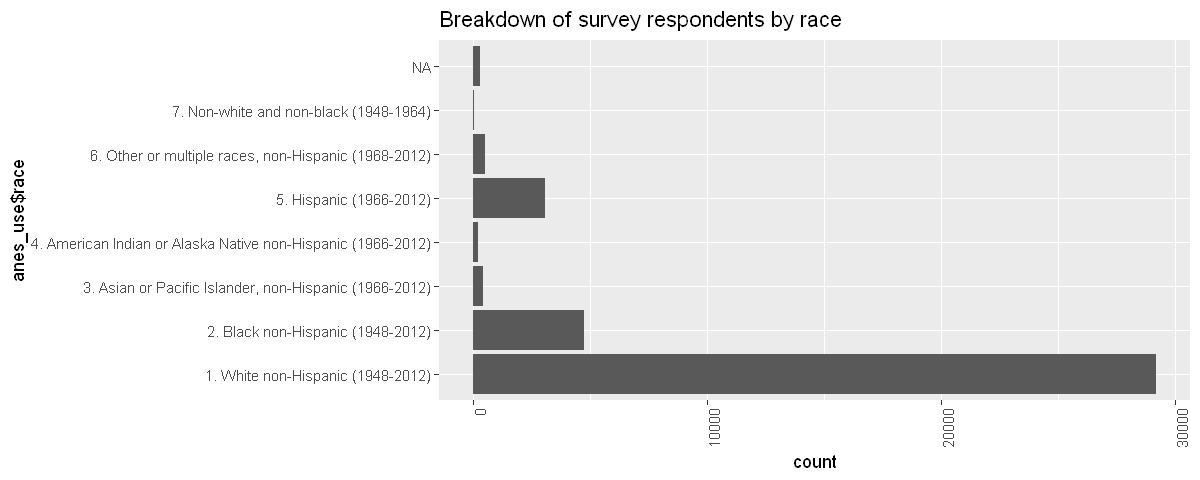

In [175]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot()+
    aes(x=anes_use$race)+
    geom_bar(stat="count")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    coord_flip()+labs(title = 'Breakdown of survey respondents by race')



In [ ]:
White Americans have the greatest representation in the survey, so we are going to focus the in-depth research on 
white Americans

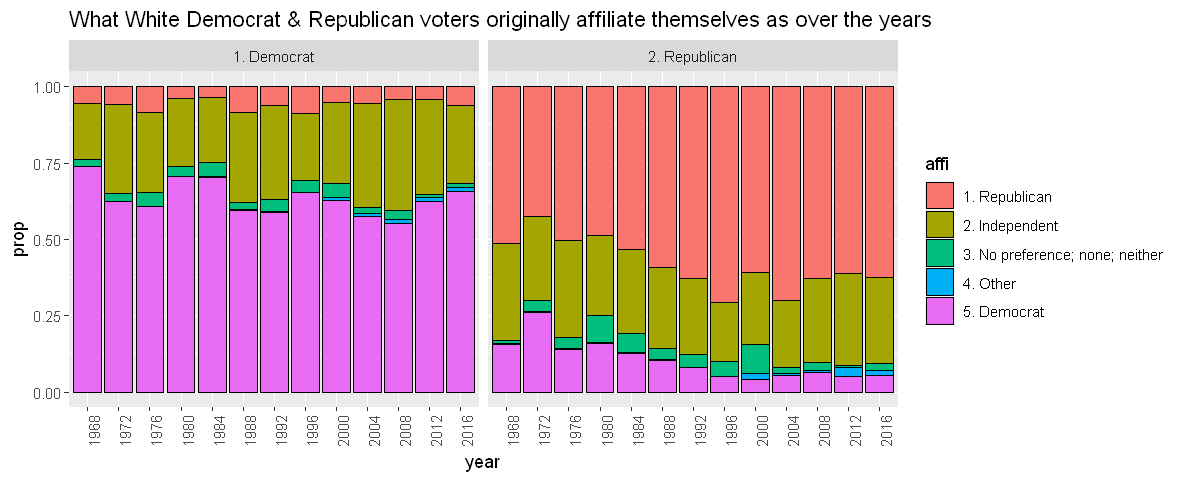

In [99]:
dem_affi = dem_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(affi)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year, vote)%>%
count(affi) %>%
group_by(year, vote)%>%
mutate(prop = n/sum(n))

rep_affi = rep_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(affi)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year, vote)%>%
count(affi) %>%
group_by(year, vote)%>%
mutate(prop = n/sum(n))

rep_dem_affi_comb = rbind(rep_affi, dem_affi)

options(repr.plot.width=10, repr.plot.height=4)
ggplot(rep_dem_affi_comb , aes(x= year, y = prop, fill= affi))+
geom_bar(stat='identity', color = 'black')+
facet_wrap(~vote, ncol = 2)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'What White Democrat & Republican voters originally affiliate themselves as over the years')



In [ ]:
We can see more Democrat turning to vote Republican than the other way round, even though the trend has gone down in the 2000s

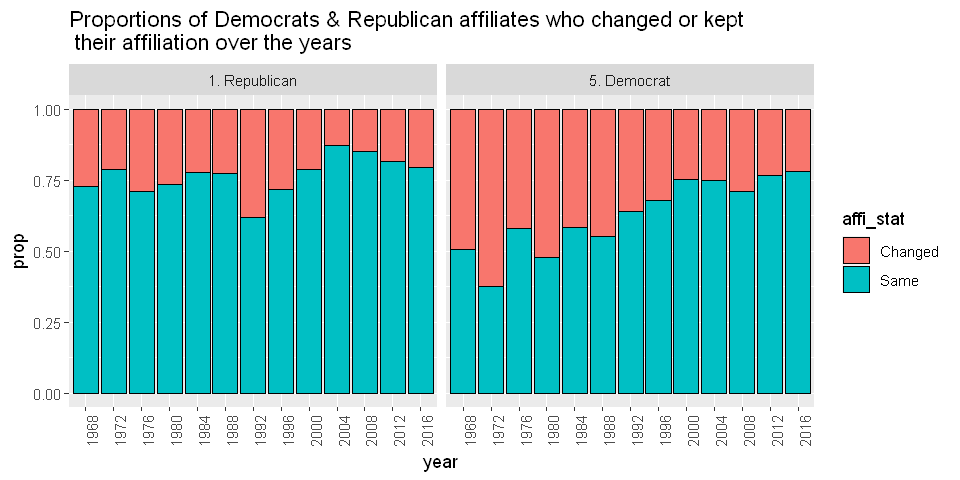

In [108]:
rep_affi_split = rep_affi%>%
filter(affi!='NA'& affi_stat!='NA')%>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(affi_stat) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))

dem_affi_split = dem_affi%>%
filter(affi!='NA'& affi_stat!='NA')%>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(affi_stat) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))

affi_split_comb = rbind(rep_affi_split,dem_affi_split)

options(repr.plot.width=8, repr.plot.height=4)
ggplot(affi_split_comb, aes(x= year, y = prop, fill= affi_stat))+
geom_bar(stat='identity', color = 'black')+
facet_wrap(~affi, ncol = 2)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Proportions of Democrats & Republican affiliates who changed or kept \n their affiliation over the years')



In [ ]:
White Republicans seem to stick to their affiliations more consistently than white Democrats, which supports the results 
above

In [13]:
We want to further examine why white Americans voted for or against candidates of their affiliated parties over the years

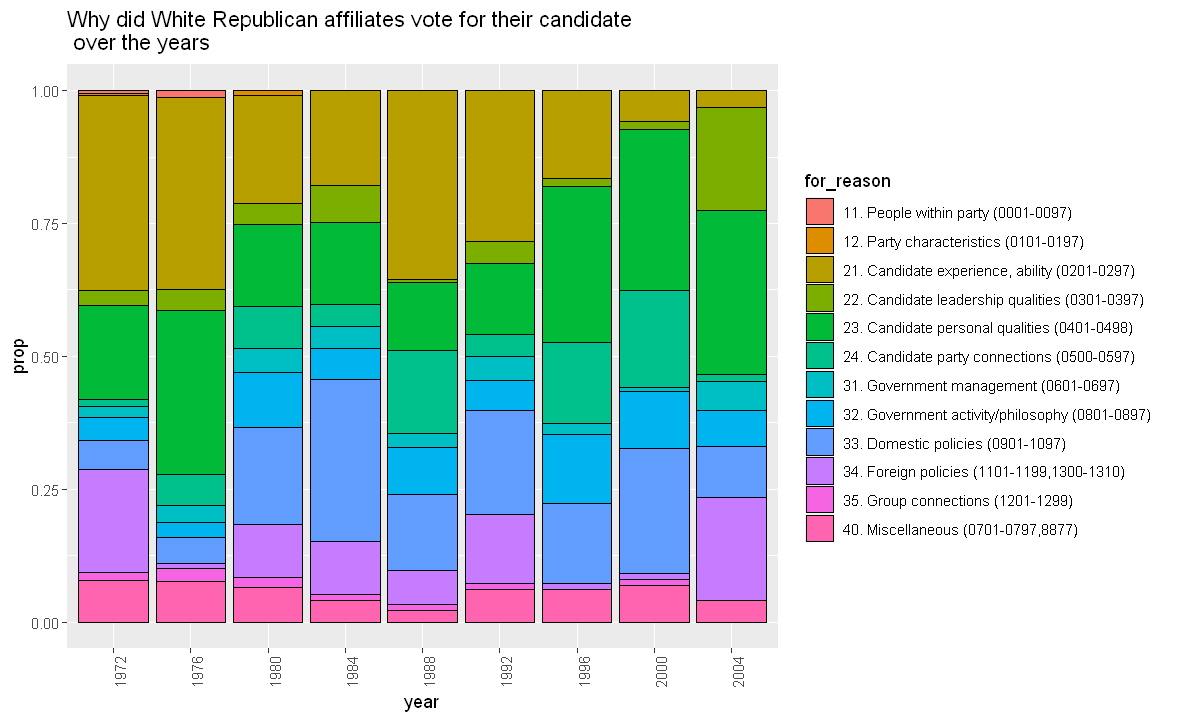

In [68]:
rep_for_reasons = rep_kept_affi %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(for_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year)%>%
count(for_reason) %>%
group_by(year)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=6)
ggplot(rep_for_reasons, aes(x= year, y = prop, fill= for_reason))+
geom_bar(stat='identity', color = 'black')+
#facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Why did White Republican affiliates vote for their candidate \n over the years')



In [69]:
Republican voters seem to vote slightly more for their candidate for personal experience & personal qualities than 
foreign and domestic policy, except for 1984 and maybe 2000s. 

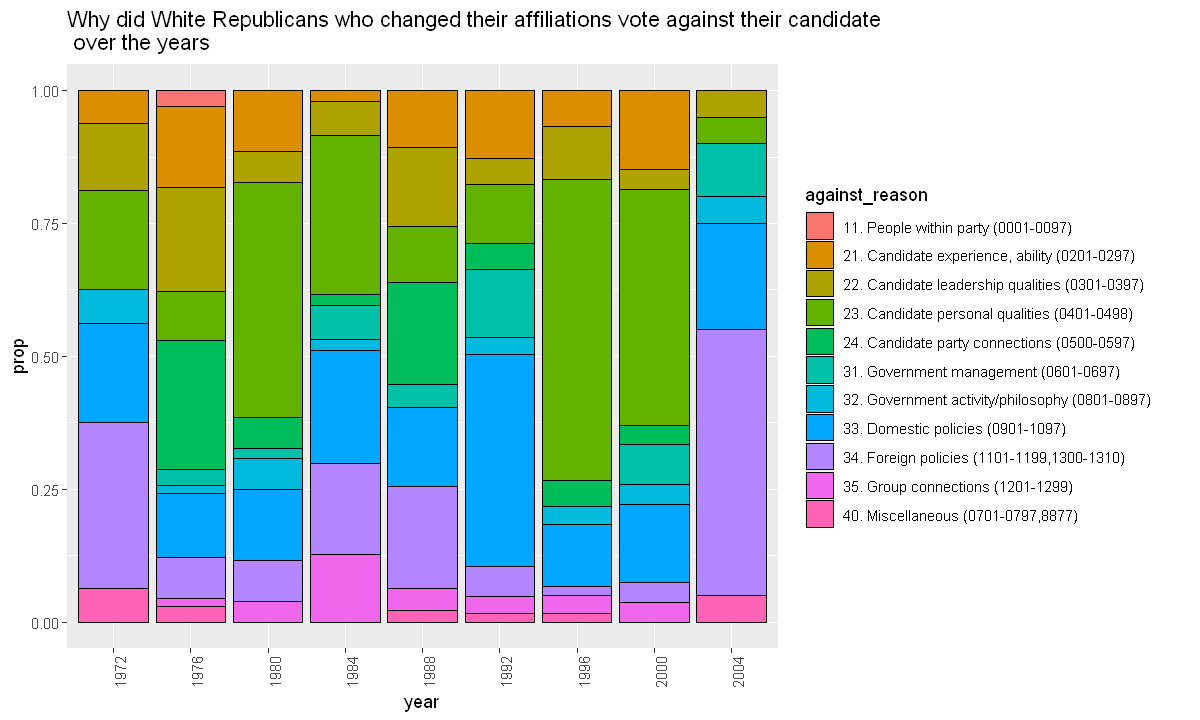

In [70]:
rep_against_reasons = rep_changed_affi %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(against_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year)%>%
count(against_reason) %>%
group_by(year)%>%
mutate(prop = n/sum(n))
#head(rep_against_reasons)

options(repr.plot.width=10, repr.plot.height=6)
ggplot(rep_against_reasons, aes(x= year, y = prop, fill= against_reason))+
geom_bar(stat='identity', color = 'black')+
#facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Why did White Republicans who changed their affiliations vote against their candidate \n over the years')


In [ ]:
Republican voters mainly voted against their candidate due to experience & personal qualities
Except for 1972 and 2004, more focus on foreign policies, possibly due to Vietnam War and 9/11 

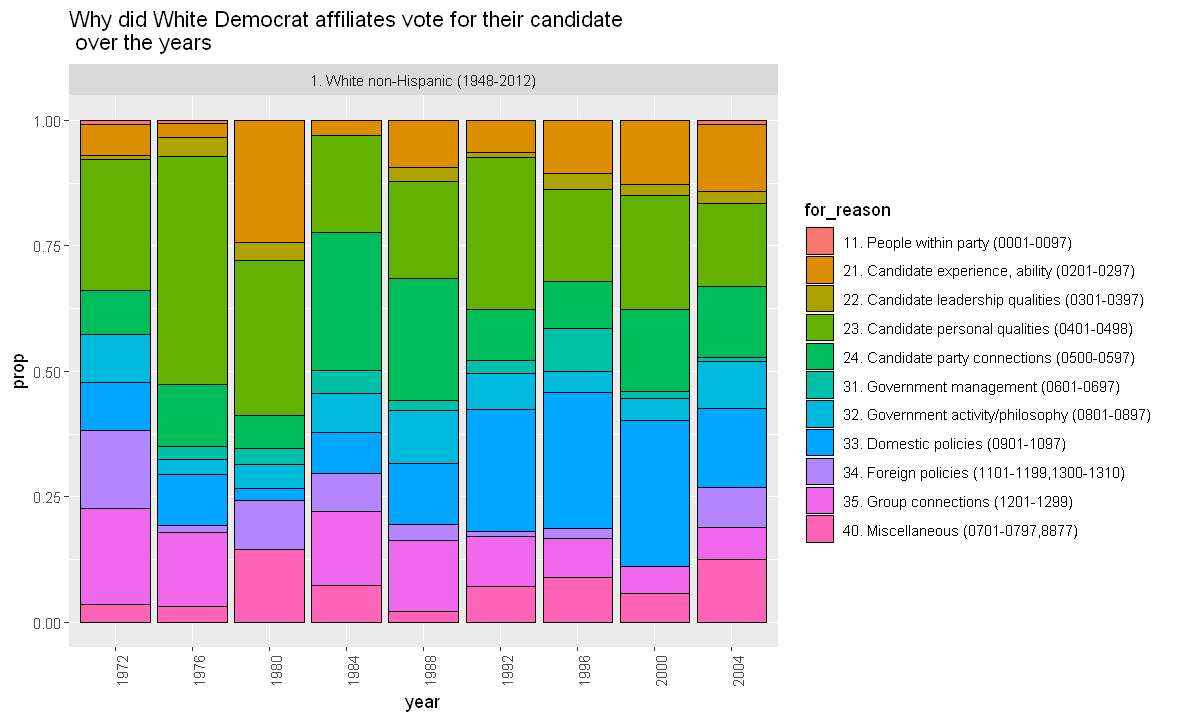

In [71]:
dem_for_reasons = dem_kept_affi %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(for_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year, race)%>%
count(for_reason) %>%
group_by(year, race)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=6)
ggplot(dem_for_reasons, aes(x= year, y = prop, fill= for_reason))+
geom_bar(stat='identity', color = 'black')+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Why did White Democrat affiliates vote for their candidate \n over the years')



In [ ]:
Before 1988, focus was more on candidate personal qualities, experience and party connections
After 1988, the focus shifted more towards domestic policies

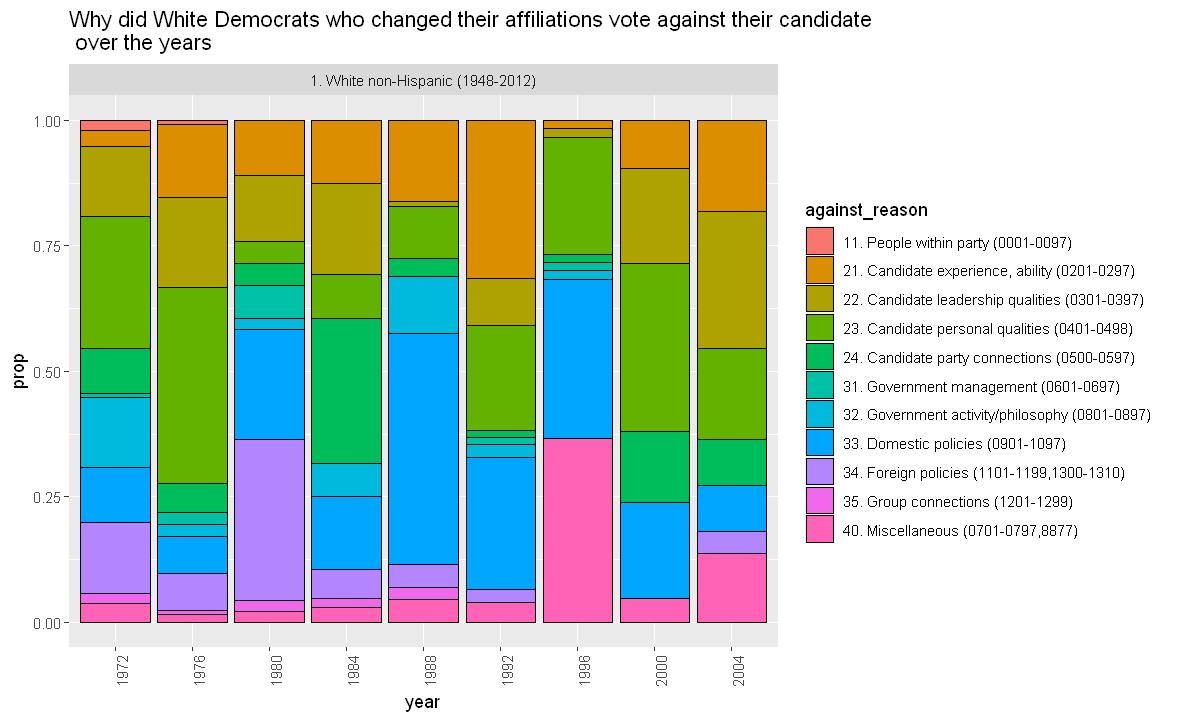

In [80]:
dem_against_reasons = dem_changed_affi %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(against_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year, race)%>%
count(against_reason) %>%
group_by(year, race)%>%
mutate(prop = n/sum(n))

#head(dem_against_reasons)
options(repr.plot.width=10, repr.plot.height=6)
ggplot(dem_against_reasons, aes(x= year, y = prop, fill= against_reason))+
geom_bar(stat='identity', color = 'black')+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Why did White Democrats who changed their affiliations vote against their candidate \n over the years')


In [ ]:
Candidate qualities still play a big role, but Domestic and foreign policies play a bigger role in why people voted 
against the candidate in the 80s 

In [ ]:
Now we want to see the cumulative, side by side view of why Republicans and Democrats affiliates voted for & against 
their candidates

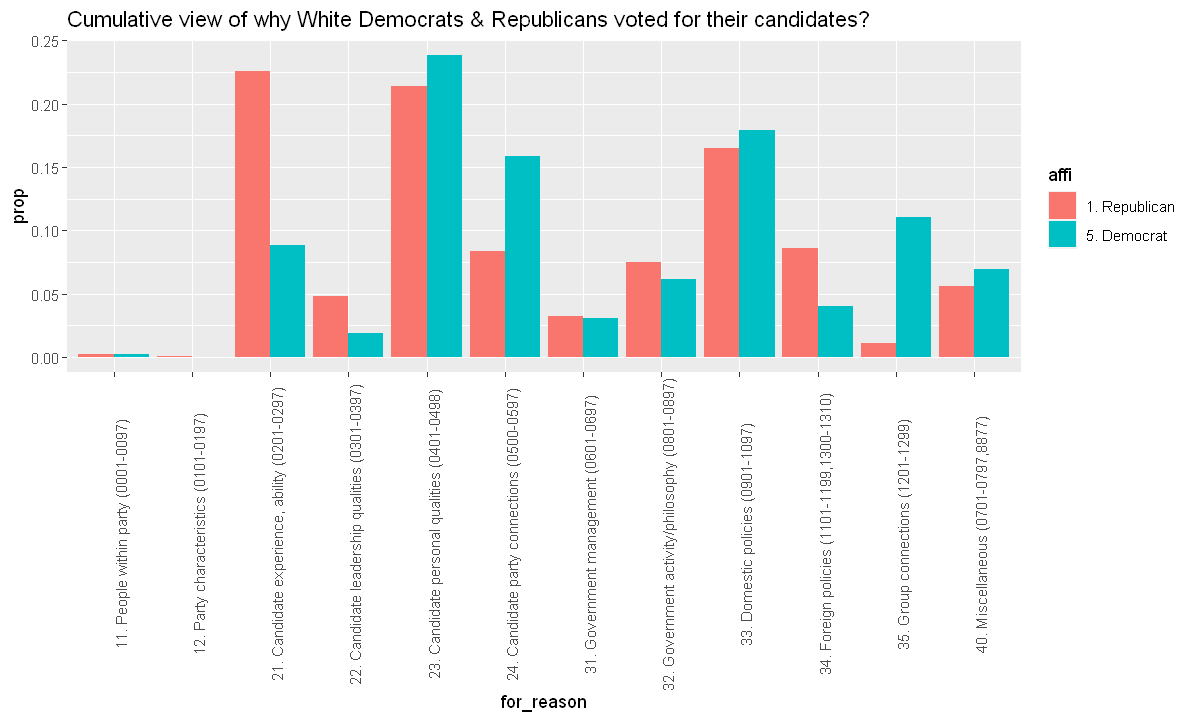

In [176]:
rep_for_reasons1 =rep_kept_affi %>% 
filter(!is.na(race)& !is.na(for_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(affi)%>%
count(for_reason) %>%
group_by(affi)%>%
mutate(prop = n/sum(n))
#print(sum(rep_for_reasons1$prop))
#print(rep_for_reasons1)

dem_for_reasons1 =dem_kept_affi %>% 
filter(!is.na(race)& !is.na(for_reason)) %>%
group_by(affi)%>%
count(for_reason) %>%
group_by(affi)%>%
mutate(prop = n/sum(n))

for_rep_dem_combined = rbind(rep_for_reasons1,dem_for_reasons1)

options(repr.plot.width=10, repr.plot.height=6)
ggplot(for_rep_dem_combined,aes(x = for_reason,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Cumulative view of why White Democrats & Republicans voted for their candidates?')


In [ ]:
Republicans seem to vote for their candidate more for their experience and ability and leadership qualities.
Democrats seem to support party and group connections of their Democrat candidates.
Democrats and Republicans care about equally about domestic policies. 


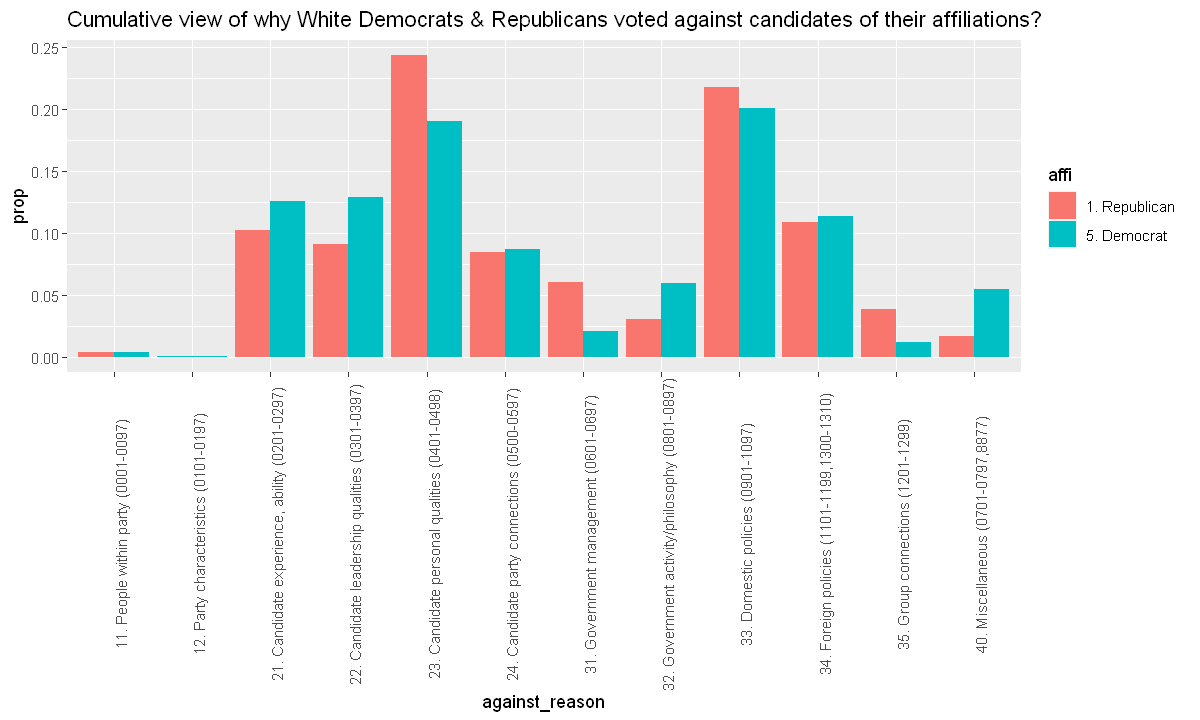

In [112]:
rep_against_reasons1 =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(against_reason)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(affi)%>%
count(against_reason) %>%
group_by(affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_for_reasons1$prop))
#print(rep_against_reasons1)

dem_against_reasons1 =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(against_reason)) %>%
group_by(affi)%>%
count(against_reason) %>%
group_by(affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_against_reasons1$prop))
# print(dem_against_reasons1)

against_rep_dem_combined = rbind(rep_against_reasons1,dem_against_reasons1)

options(repr.plot.width=10, repr.plot.height=6)
ggplot(against_rep_dem_combined,aes(x = against_reason,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
#theme(legend.position="bottom")
labs(title = 'Cumulative view of why White Democrats & Republicans voted against candidates of their affiliations?')


In [ ]:
Democrats seem to be a bit more against their candidate experience and ability and leadership qualities.
Republicans seem to be more against their candidate personal qualities.
Democrats and Republicans care about equally about foreign policies.

In [ ]:
ii. We now move on to breaking down voters by occupation, education, religion, etc.

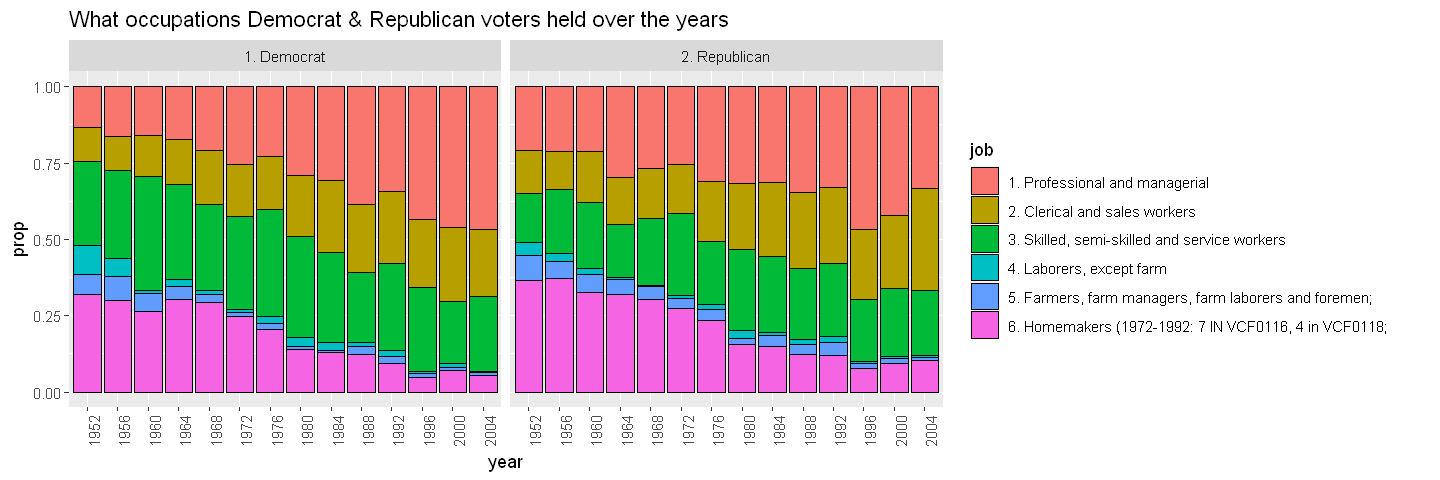

In [115]:
#options(repr.plot.width=10, repr.plot.height=12)
rep_jobs = rep_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(job)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,vote)%>%
count(job) %>%
group_by(year,vote)%>%
mutate(prop = n/sum(n))

dem_jobs = dem_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(job)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,vote)%>%
count(job) %>%
group_by(year,vote)%>%
mutate(prop = n/sum(n))

rep_dem_jobs_comb= rbind(rep_jobs,dem_jobs)

options(repr.plot.width=12, repr.plot.height=4)
ggplot(rep_dem_jobs_comb, aes(x= year, y = prop, fill= job))+
geom_bar(stat='identity', color = 'black')+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~vote, ncol = 2)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'What occupations Democrat & Republican voters held over the years')

In [ ]:
We see an increasing portion of professionals and managers who voted Democrats more recently (in the 2000s).
We also see an increasing portion of skilled, semi-skilled and service workers who voted Republican over time.

In [94]:
Now, we want to see % of White Republicans or Democrat affiliates who did not vote for their affiliation by occupation by year

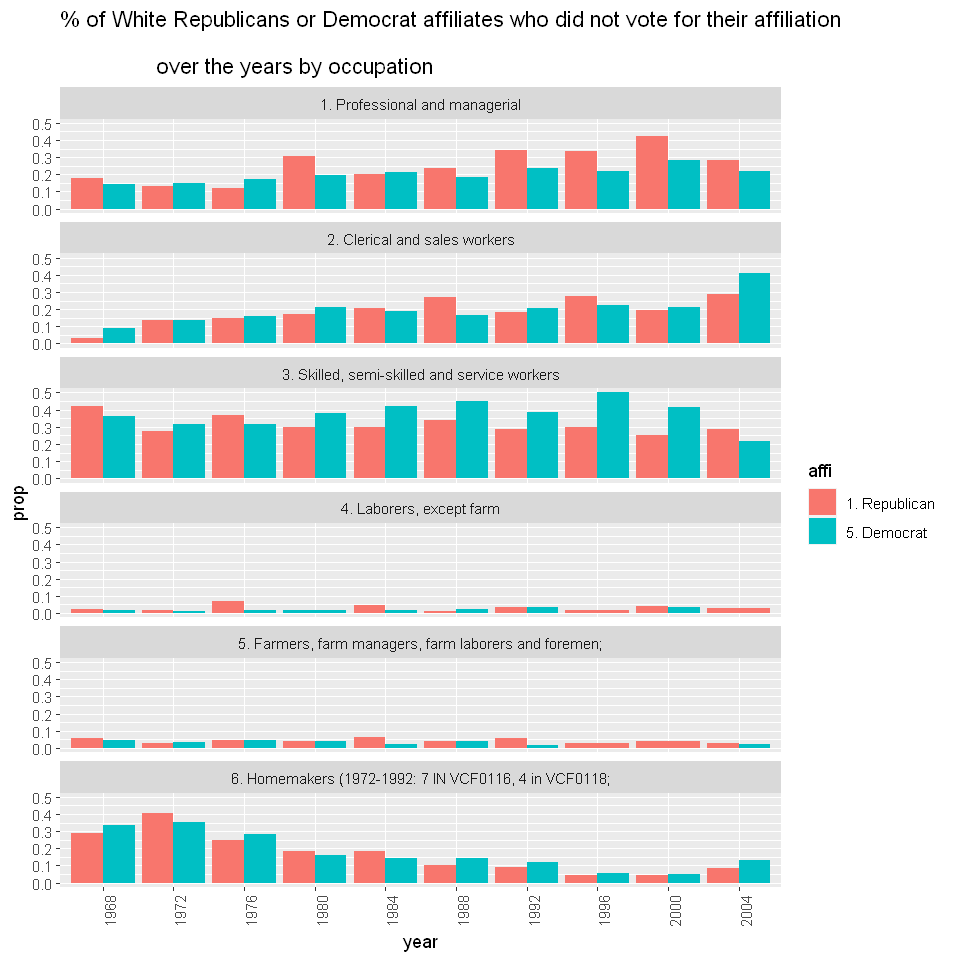

In [114]:
rep_changed_jobs =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(job)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(job) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_jobs$prop))
# print(rep_changed_jobs)

dem_changed_jobs =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(job)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(job) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_jobs$prop))
# print(dem_changed_jobs)

rep_dem_changed_jobs = rbind(rep_changed_jobs,dem_changed_jobs)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_jobs ,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~job, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for their affiliation \n
                over the years by occupation")


In [ ]:
1. More and more White Republican Professionals and Managers voted outside of their affiliated parties than 
than Democrats holding the same jobs, especially in the 90s and early 2000s, 
which validates why we see more people in those professions voting Democrats in the previous chart.
2. More White Democrat Skilled, Semi-skilled, service workers and homemakers who voted outside of their affiliated parties than 
Republicans holding the same jobs, from around the 80s and early 2000s, which again, supports the claim above.

In [ ]:
Doing the same analysis, but for employment status

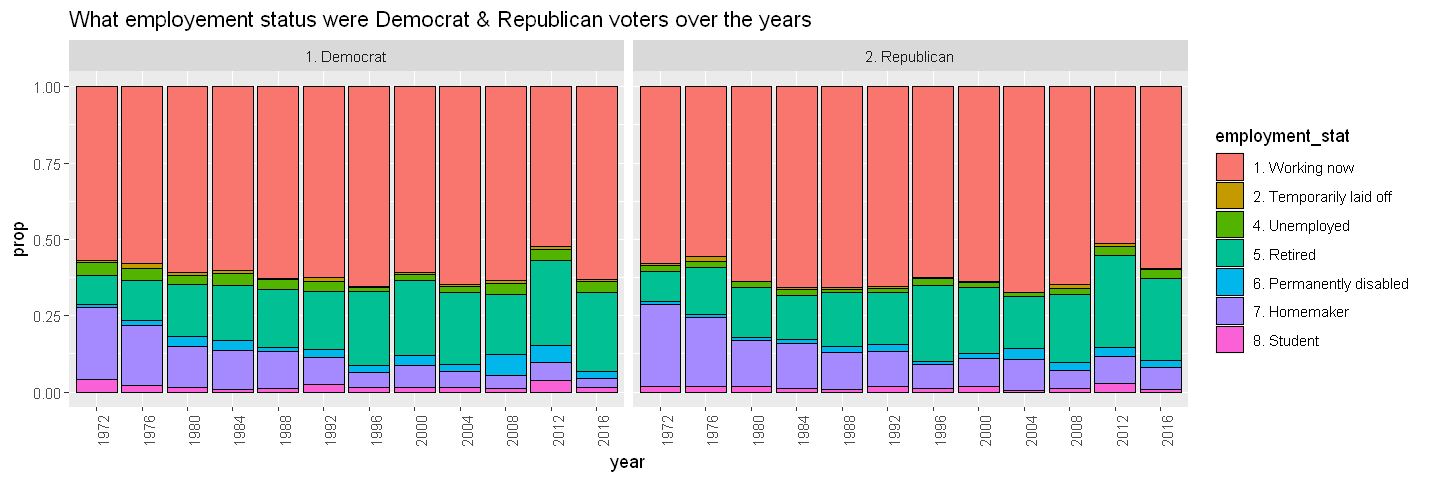

In [116]:
#options(repr.plot.width=10, repr.plot.height=12)
rep_employment_stats = rep_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(employment_stat)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,vote)%>%
count(employment_stat) %>%
group_by(year,vote)%>%
mutate(prop = n/sum(n))

dem_employment_stats = dem_vote %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(employment_stat)) %>%
filter(race =='1. White non-Hispanic (1948-2012)')%>%
group_by(year,vote)%>%
count(employment_stat) %>%
group_by(year,vote)%>%
mutate(prop = n/sum(n))

rep_dem_employment_stats_comb= rbind(rep_employment_stats,dem_employment_stats)

options(repr.plot.width=12, repr.plot.height=4)
ggplot(rep_dem_employment_stats_comb, aes(x= year, y = prop, fill= employment_stat))+
geom_bar(stat='identity', color = 'black')+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~vote, ncol = 2)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'What employement status were Democrat & Republican voters over the years')

In [ ]:
We proceed to see % of White Republicans or Democrat affiliates who did not vote for their affiliation by employment status 
by year

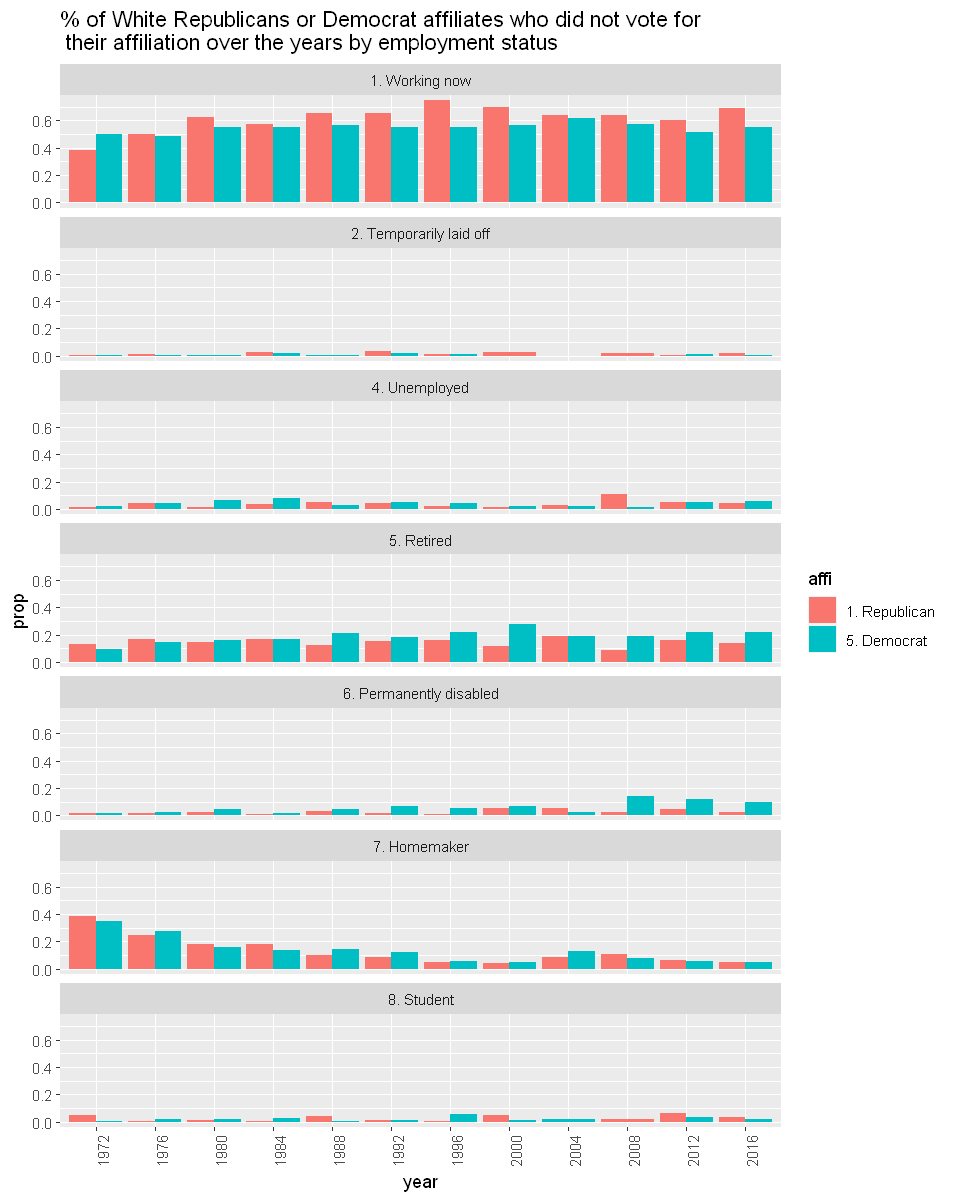

In [118]:
rep_changed_empstat =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(employment_stat)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(employment_stat) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_empstat =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(employment_stat)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(employment_stat) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_empstat = rbind(rep_changed_empstat,dem_changed_empstat)

options(repr.plot.width=8, repr.plot.height=10)

ggplot(rep_dem_changed_empstat,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~employment_stat, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for \n their affiliation over the years by employment status")


In [ ]:
One can see working White Republicans tend to vote for other parties than working Democrats, whereas the reverse is 
true for retired workers

In [ ]:
Next, we want to see % of White Republicans or Democrat affiliates who didn not vote for their affiliation by Religion 
by year


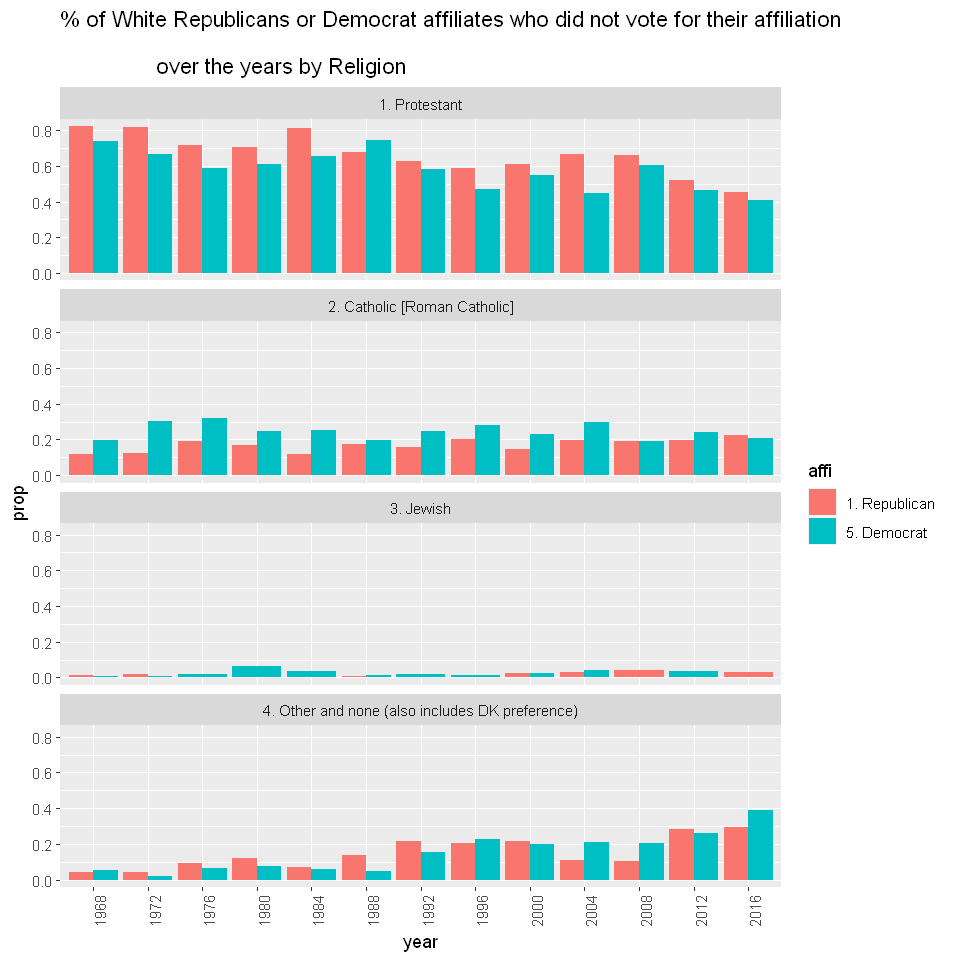

In [119]:

rep_changed_religion =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(religion)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(religion) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_religion =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(religion)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(religion) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_religion = rbind(rep_changed_religion,dem_changed_religion)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_religion,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~religion, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for their affiliation \n
                over the years by Religion")


In [ ]:
Percentage of protestant White Republicans tend to vote for other parties than Democrats. 
The reverse is true for White Catholics

In [ ]:
Next is percentage of White Republicans or Democrat affiliates who did not vote for their affiliation by education 
by year

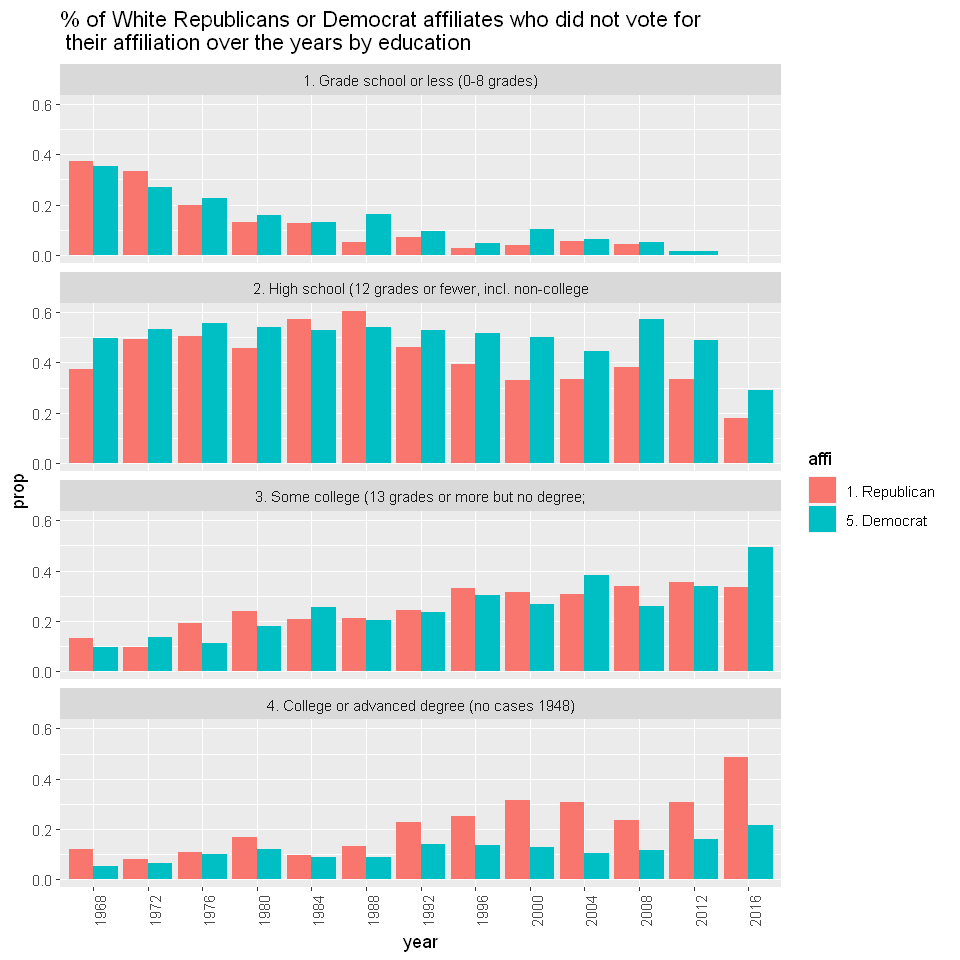

In [120]:
rep_changed_education =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(education)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(education) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_education =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(education)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(education) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_education = rbind(rep_changed_education,dem_changed_education)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_education,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~education, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by education")


In [ ]:
--> More and more college & advanced degree white Republicans vote for other parties than those that are Democrats,
especially in more recent years and 2016. 
The reverse is true for those with lower levels of education (some college or less).

In [ ]:
Doing the same analysis by social_class by year

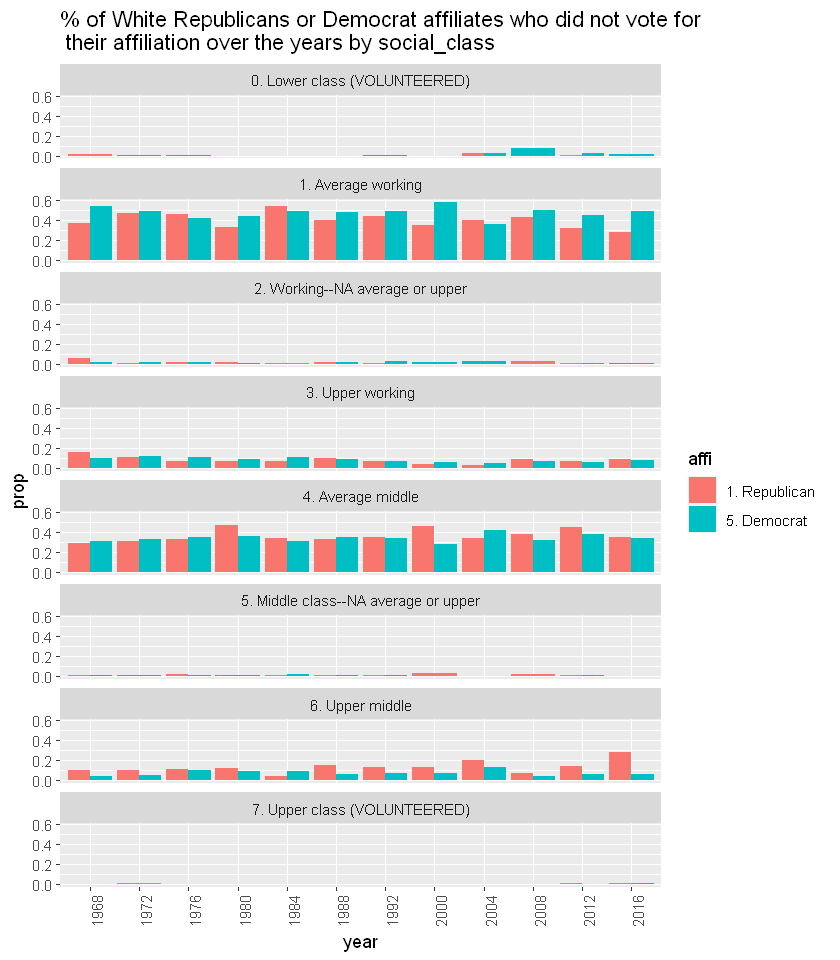

In [123]:
rep_changed_social_class =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(social_class)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(social_class) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_social_class =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(social_class)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(social_class) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_social_class = rbind(rep_changed_social_class,dem_changed_social_class)

options(repr.plot.width=7, repr.plot.height=8)

ggplot(rep_dem_changed_social_class,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~social_class, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by social_class")


In [ ]:
Upper middle class White Republicans tend to vote for other parties than those that are Democrats, espcially in 2016
The reverse is true for white average working class: Democrat affiliates tend to vote more for other parties, 
a phenomenon observed in 2016 election

In [ ]:
We then disect specificially by income groups by year

In [ ]:
First, we just look at Republican and Democrat voters by income group regardless of their affiliations

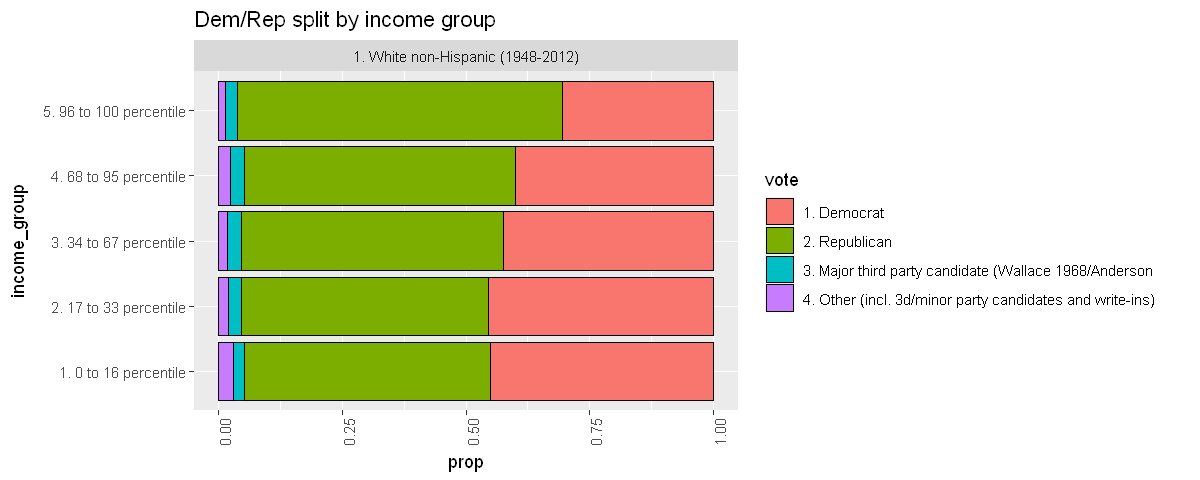

In [137]:
voter_income = anes_use %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(income_group)) %>%
filter(vote!='7. Did not vote or voted but not for president (exc.1972)')%>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(income_group, race)%>%
count(vote) %>%
group_by(income_group, race)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=4)
ggplot(voter_income, aes(x=income_group, y = prop, fill= vote))+
geom_bar(stat='identity', color = 'black')+
coord_flip()+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Dem/Rep split by income group')

In [ ]:
We can see that cumulatively, higher income white people tend to vote Republican more than Democrat, while lower income white
people tend to vote more Democrat than Republican. 

In [ ]:
However, we can examine further those who didn't vote according to their affiliations

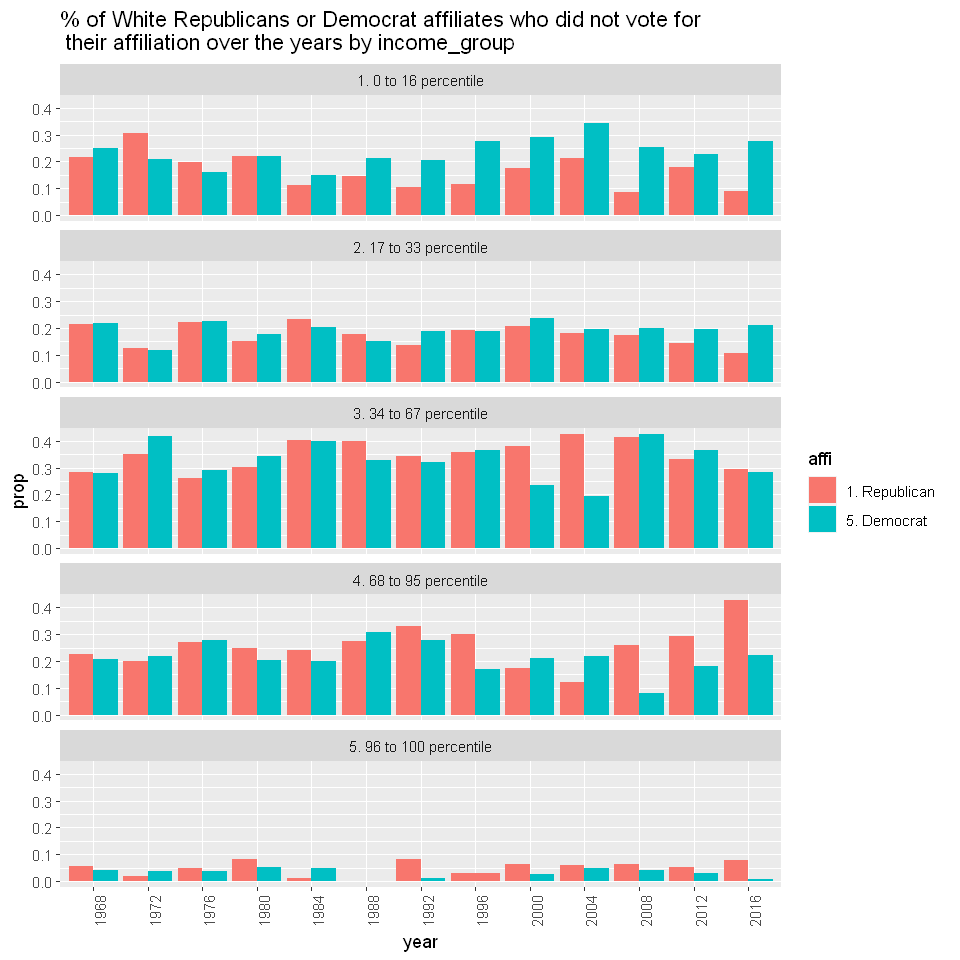

In [138]:
rep_changed_income_group =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(income_group)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(income_group) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_income_group =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(income_group)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(income_group) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_income_group = rbind(rep_changed_income_group,dem_changed_income_group)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_income_group,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~income_group, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by income_group")



In [141]:
->More white Republicans with middle to high income (68% percentile and above ) voted outside of their affiliation
than those that are Democrats in the 90s and after 2008, especially more so in 2016 
The reverse is true for those with lower levels of income_group (33% percentile and below), espcially in 2016

In [ ]:
We are intersted to see % of White Republicans or Democrat affiliates who did not vote for their affiliation by region.
First, we look at the cumulative view over the years of Dem/ Rep voters split


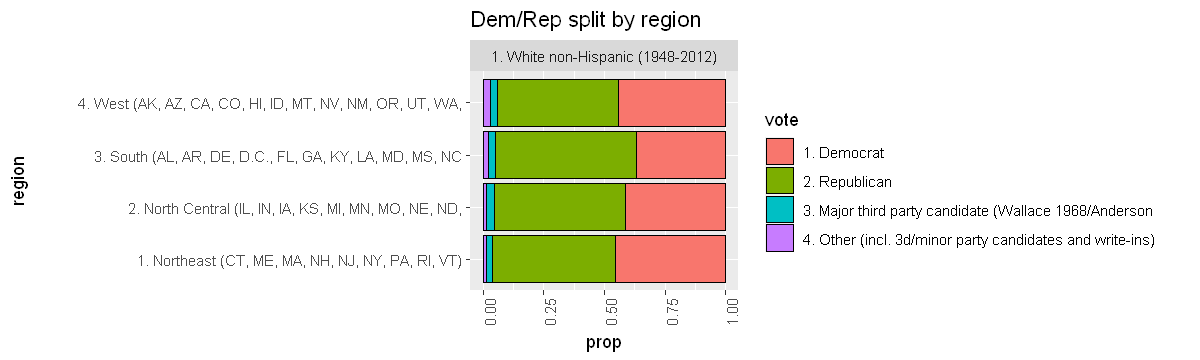

In [145]:
voter_region = anes_use %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(region)) %>%
filter(vote!='7. Did not vote or voted but not for president (exc.1972)')%>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(region, race)%>%
count(vote) %>%
group_by(region, race)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=3)
ggplot(voter_region, aes(x=region, y = prop, fill= vote))+
geom_bar(stat='identity', color = 'black')+
coord_flip()+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Dem/Rep split by region')

In [ ]:
People in the South and North Central ten to vote Republican more than the West or Northeast.
Examining more closely those who deviated from their affiliation

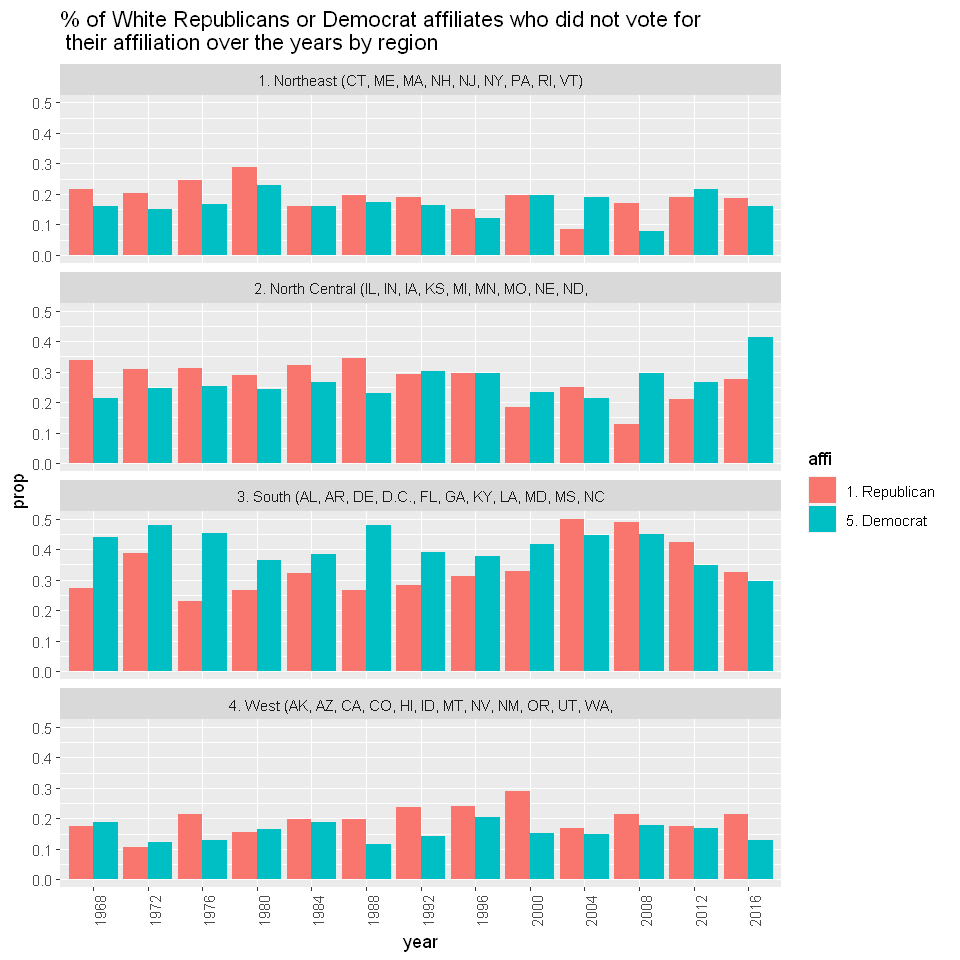

In [142]:
rep_changed_region =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(region)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(region) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_region =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(region)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(region) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_region = rbind(rep_changed_region,dem_changed_region)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_region,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~region, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by region")


In [ ]:
White Republicans in North central used to vote for other parties more than those that are Democrats, 
but trend reversed after 2008, espcially in 2016.
White Republicans in the West tend to vote for other parties more than those that are Democrats fairly consistently, 
espcially in 2000 and 2016.
White Republicans in Northeast used to vote for other parties more than those that are Democrats, 
but trend has evened out since 1984.

In [ ]:
% of White Republicans or Democrat affiliates who did not vote for their affiliation by urbanism 
by year

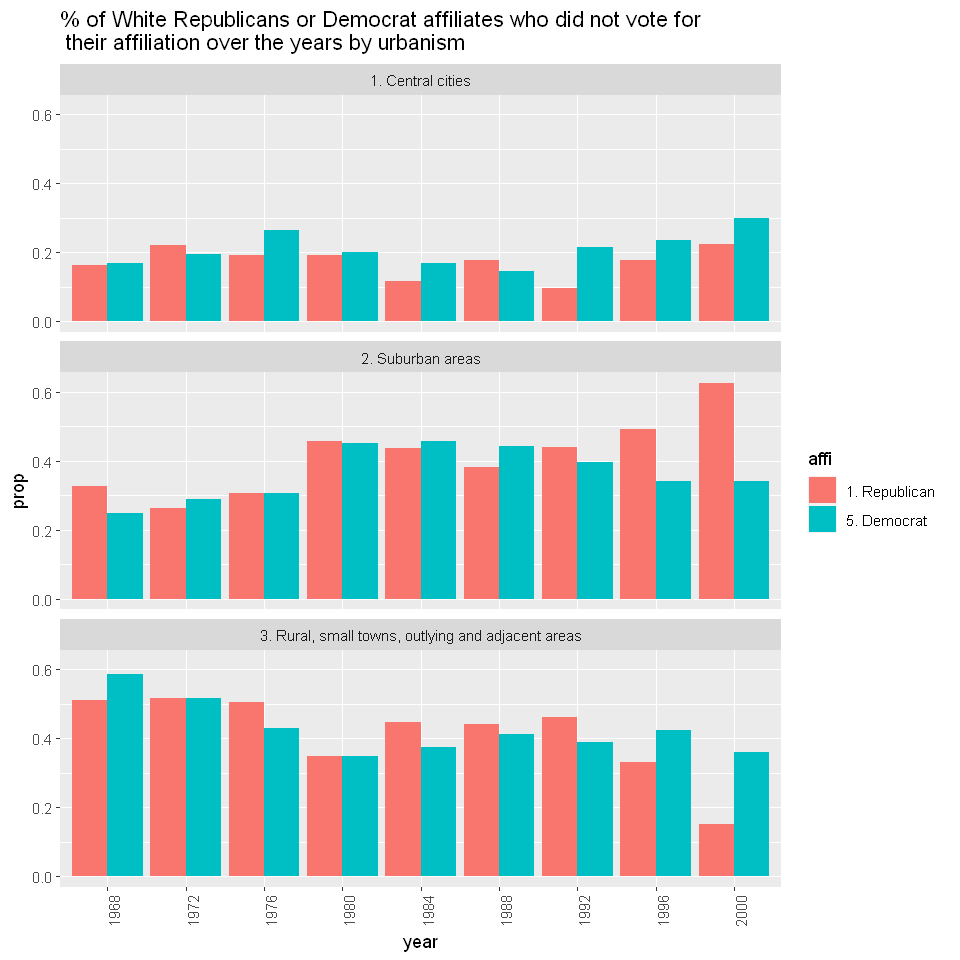

In [146]:
rep_changed_urbanism =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(urbanism)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(urbanism) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_urbanism =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(urbanism)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(urbanism) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_urbanism = rbind(rep_changed_urbanism,dem_changed_urbanism)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_urbanism,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~urbanism, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by urbanism")


In [177]:
White Republicans in Suburban areas started to vote for other parties more after 1996, even though overall people in suburban 
and rural areas tend to vote for Republican more than Democrats, as seen below. 
White Democrats in rural areas to vote for other parties more than those that are Republicans after 1996. 
There seems to be an overall shift from rural areas to suburban in those who switched parties overall.

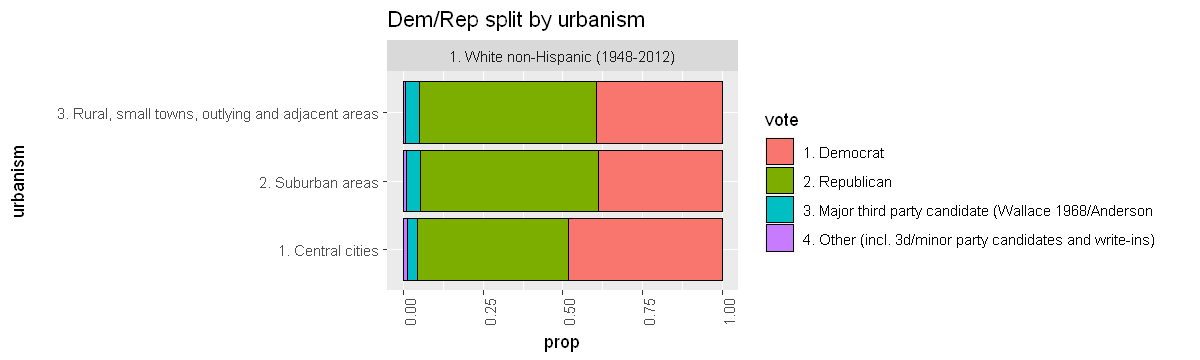

In [148]:
voter_urbanism = anes_use %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(urbanism)) %>%
filter(vote!='7. Did not vote or voted but not for president (exc.1972)')%>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(urbanism, race)%>%
count(vote) %>%
group_by(urbanism, race)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=3)
ggplot(voter_urbanism, aes(x=urbanism, y = prop, fill= vote))+
geom_bar(stat='identity', color = 'black')+
coord_flip()+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Dem/Rep split by urbanism')

In [ ]:
Lastly, we want to see if media exposure has much effect on % of White Republicans or Democrat affiliates who ended
up not voting for their affiliation 


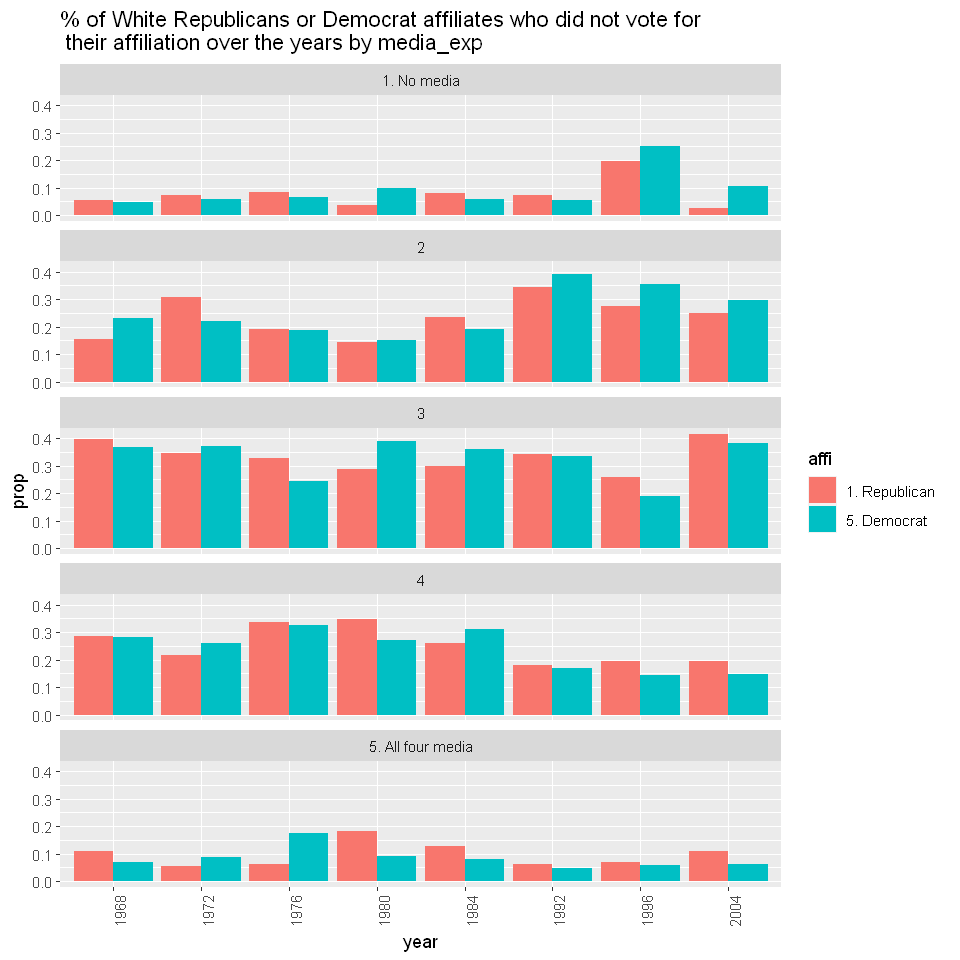

In [150]:
rep_changed_media_exp =rep_changed_affi %>% 
filter(!is.na(race)&!is.na(media_exp)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(media_exp) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(rep_changed_empstat$prop))
# print(rep_changed_empstat)

dem_changed_media_exp =dem_changed_affi %>% 
filter(!is.na(race)&!is.na(media_exp)) %>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(year,affi)%>%
count(media_exp) %>%
group_by(year,affi)%>%
mutate(prop = n/sum(n))
# print(sum(dem_changed_empstat$prop))
# print(dem_changed_empstat)

rep_dem_changed_media_exp = rbind(rep_changed_media_exp,dem_changed_media_exp)

options(repr.plot.width=8, repr.plot.height=8)

ggplot(rep_dem_changed_media_exp,aes(x = year,y= prop, fill=affi))+geom_bar(stat='identity',position="dodge")+
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~media_exp, ncol = 1)+
labs(title =  "% of White Republicans or Democrat affiliates who did not vote for\n their affiliation over the years by media_exp")


In [ ]:
White Democrats with little to no media exposrue tend to vote for other parties than those that are Republicans after 1992 
White Republicans with moderate to all 5 means of media tend to vote for other parties more than those that are Democrats after 1992 
Media does seem to contribute somewhat to people switching parties, but the effect is not very pronounced, except for maybe 1980 and 2004

In [ ]:
The cumulative view below also shows not a huge difference in Rep/ Dem voters split even though the amount of media exposure 
varies

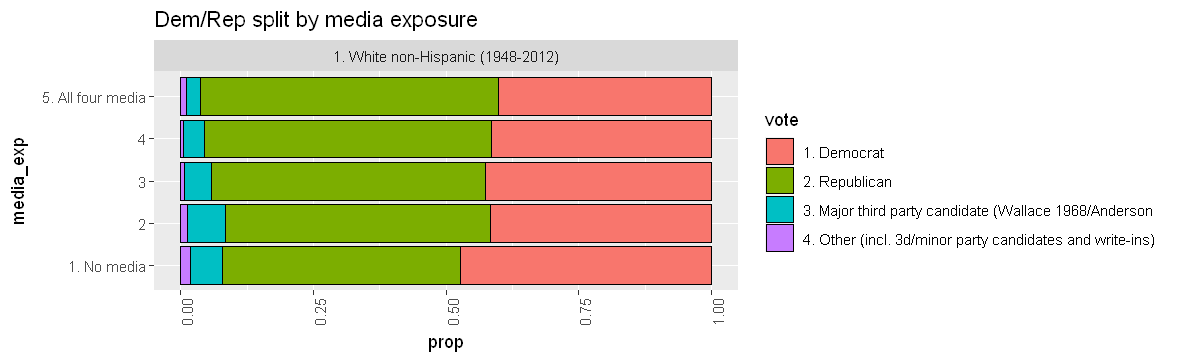

In [152]:
voter_media_exp = anes_use %>% 
filter(!is.na(race) &! is.na(vote)&! is.na(media_exp)) %>%
filter(vote!='7. Did not vote or voted but not for president (exc.1972)')%>%
filter(race=='1. White non-Hispanic (1948-2012)')%>%
group_by(media_exp, race)%>%
count(vote) %>%
group_by(media_exp, race)%>%
mutate(prop = n/sum(n))

options(repr.plot.width=10, repr.plot.height=3)
ggplot(voter_media_exp, aes(x=media_exp, y = prop, fill= vote))+
geom_bar(stat='identity', color = 'black')+
coord_flip()+
#scale_fill_manual(values = c('dodgerblue3','firebrick2','gold1','lightgoldenrod1'))+
facet_wrap(~race, ncol = 1)+
theme(axis.text.x = element_text(angle = 90))+
labs(title = 'Dem/Rep split by media exposure')

In [ ]:
Conclusion: 

Some key takeaways from the analysis above: 
i. White Republicans seem to stick to their affiliations more consistently than white Democrats.
Republicans seem to vote for their candidate more for their experience and ability and leadership qualities, while 
Democrats seem to support party and group connections of their Democrat candidates.

Democrats seem to be a bit more against their candidate experience and ability and leadership qualities, while 
Republicans seem to be more against their candidate personal qualities.

ii. More recently (in the 2000s and onwards), we have been seeing an increasing portion of professionals and managers, employed,
college & advanced degree educated, or upper middle class white Republicans, who voted for Democrats or other parties, especially 
in 2016. 

The reverse is true for skilled, semi-skilled and service workers, or those with lower levels of education 
(some college or less), or white average working class Democrat. Those have been tending to vote more for Republian 
or other parties, a phenomenon observed in 2016 election. 

This is an interesting shift in stereotypes we have observed in the past, most likely changes in social justice issues and 
policies towards those of the 2 parties. 

Contrary to some might believe, media does not seem to have that much of an effect in changing one's voting decision. 